In [ ]:
import cv2
import matplotlib.pyplot as plt
# Load the image
im = cv2.imread('nothealthy.JPG', cv2.IMREAD_GRAYSCALE)

# Apply Otsu's method
_, thresh = cv2.threshold(im, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

img_rgb = cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB)

# Display the original image and the thresholded image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.imshow(im, cmap='gray')
ax1.axis('off')
ax2.imshow(img_rgb)
ax2.axis('off')
plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image and convert to grayscale
img = cv2.imread('nothealthy.JPG')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Otsu's thresholding to segment leaf and background
thresh_val, img_thresh = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Remove noise using morphological opening operation
kernel = np.ones((3, 3), np.uint8)
img_opening = cv2.morphologyEx(img_thresh, cv2.MORPH_OPEN, kernel)

# Identify infected part of leaf using contour detection
contours, hierarchy = cv2.findContours(img_opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
infected_area = max(contours, key=cv2.contourArea)

# Draw infected area on original image
img_copy = img.copy()
cv2.drawContours(img_copy, [infected_area], 0, (0, 255, 0), 3)

# Display original image with infected area highlighted
plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image and convert to grayscale
img = cv2.imread('nothealthy.JPG')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Otsu's thresholding to segment leaf and background
thresh_val, img_thresh = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Remove noise using morphological opening operation
kernel = np.ones((3, 3), np.uint8)
img_opening = cv2.morphologyEx(img_thresh, cv2.MORPH_OPEN, kernel)

# Identify infected parts of leaf using contour detection
contours, hierarchy = cv2.findContours(img_opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a blank mask for the infected areas
mask = np.zeros_like(img_gray)

# Loop over all detected contours and draw them on the mask
for contour in contours:
    # Calculate the contour area and bounding box
    area = cv2.contourArea(contour)
    x, y, w, h = cv2.boundingRect(contour)
    
    # Check if the contour is sufficiently large and not too elongated
    if area > 100 and area < 5000 and h/w < 2:
        # Draw the contour on the mask
        cv2.drawContours(mask, [contour], 0, 255, -1)

# Apply the mask to the original image to highlight the infected areas
img_copy = img.copy()
img_copy[mask == 0] = [0, 0, 0]

# Display original image with infected areas highlighted
plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the image in grayscale
img = cv2.imread('nothealthy.JPG', cv2.IMREAD_GRAYSCALE)

# Apply Otsu thresholding
ret, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Get contours of the thresholded image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image
img_contours = cv2.drawContours(img.copy(), contours, -1, (0, 255, 0), 2)

# Show the images
plt.subplot(1,2,1), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2), plt.imshow(img_contours, cmap='gray')
plt.title('Infected Parts Highlighted'), plt.xticks([]), plt.yticks([])
plt.show()


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the image in grayscale
img = cv2.imread('nothealthy.JPG', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to reduce noise
img_blur = cv2.GaussianBlur(img, (5, 5), 0)

# Apply adaptive thresholding to separate foreground and background
thresh = cv2.adaptiveThreshold(img_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Apply Otsu thresholding to separate foreground and background
ret, thresh_otsu = cv2.threshold(thresh, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Get contours of the thresholded image
contours, hierarchy = cv2.findContours(thresh_otsu, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image
img_contours = cv2.drawContours(img.copy(), contours, -1, (0, 255, 0), 2)

# Show the images
plt.subplot(1,2,1), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2), plt.imshow(img_contours, cmap='gray')
plt.title('Infected Parts Highlighted'), plt.xticks([]), plt.yticks([])
plt.show()


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the image in grayscale
img = cv2.imread('nothealthy.JPG', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to reduce noise
img_blur = cv2.GaussianBlur(img, (5, 5), 0)

# Apply adaptive thresholding to separate foreground and background
thresh = cv2.adaptiveThreshold(img_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Apply Otsu thresholding to separate foreground and background
ret, thresh_otsu = cv2.threshold(thresh, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Apply morphological operations to remove small holes in the thresholded image
kernel = np.ones((5,5),np.uint8)
closing = cv2.morphologyEx(thresh_otsu, cv2.MORPH_CLOSE, kernel)

# Get contours of the thresholded image
contours, hierarchy = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image
img_contours = cv2.drawContours(img.copy(), contours, -1, (0, 255, 0), 2)

# Show the images
plt.subplot(1,2,1), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2), plt.imshow(img_contours, cmap='gray')
plt.title('Infected Parts Highlighted'), plt.xticks([]), plt.yticks([])
plt.show()


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the image in grayscale
img = cv2.imread('nothealthy.JPG', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to reduce noise
img_blur = cv2.GaussianBlur(img, (5, 5), 0)

# Apply Otsu thresholding to separate foreground and background
ret, thresh_otsu = cv2.threshold(img_blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Apply morphological operations to remove small holes in the thresholded image
kernel = np.ones((5,5),np.uint8)
closing = cv2.morphologyEx(thresh_otsu, cv2.MORPH_CLOSE, kernel)

# Get contours of the thresholded image
contours, hierarchy = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image
img_contours = cv2.drawContours(img.copy(), contours, -1, (0, 255, 0), 2)

# Show the images
plt.subplot(1,2,1), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2), plt.imshow(img_contours, cmap='gray')
plt.title('Infected Parts Highlighted'), plt.xticks([]), plt.yticks([])
plt.show()


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the image in grayscale
img = cv2.imread('nothealthy.JPG', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to reduce noise
img_blur = cv2.GaussianBlur(img, (5, 5), 0)

# Apply Otsu thresholding to separate foreground and background
ret, thresh_otsu = cv2.threshold(img_blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Invert the thresholded image
thresh_inv = cv2.bitwise_not(thresh_otsu)

# Apply morphological operations to remove small holes in the thresholded image
kernel = np.ones((5,5),np.uint8)
closing = cv2.morphologyEx(thresh_inv, cv2.MORPH_CLOSE, kernel)

# Get contours of the thresholded image
contours, hierarchy = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image
img_contours = cv2.drawContours(img.copy(), contours, -1, (0, 255, 0), 2)

# Show the images
plt.subplot(1,2,1), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2), plt.imshow(img_contours, cmap='gray')
plt.title('Infected Parts Highlighted'), plt.xticks([]), plt.yticks([])
plt.show()


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the image
img = cv2.imread('nothealthy.JPG')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply adaptive thresholding to separate foreground and background
thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Apply morphological opening to remove small objects
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

# Apply Otsu thresholding to separate the leaf from the background
ret, thresh_otsu = cv2.threshold(opening, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Apply morphological closing to fill small holes in the leaf
kernel = np.ones((9,9),np.uint8)
closing = cv2.morphologyEx(thresh_otsu, cv2.MORPH_CLOSE, kernel)

# Get contours of the thresholded image
contours, hierarchy = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image
img_contours = img.copy()
cv2.drawContours(img_contours, contours, -1, (0, 255, 0), 2)

# Show the images
plt.subplot(1,2,1), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2), plt.imshow(cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB))
plt.title('Infected Parts Highlighted'), plt.xticks([]), plt.yticks([])
plt.show()


In [ ]:
import cv2
import numpy as np

# Read the image in grayscale mode
img = cv2.imread('nothealthy.JPG', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to remove noise
blur = cv2.GaussianBlur(img, (3, 3), 0)

# Apply Otsu's thresholding to get a binary mask
ret, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Perform morphological opening to remove small white noise regions
kernel = np.ones((5,5),np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

# Perform morphological closing to remove small black holes within white regions
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

# Find contours in the binary mask
contours, hierarchy = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on a copy of the original color image
img_color = cv2.imread('nothealthy.JPG')
cv2.drawContours(img_color, contours, -1, (0, 255, 0), 2)

# Display the result
cv2.imshow('Result', img_color)
cv2.waitKey(20)
cv2.destroyAllWindows()


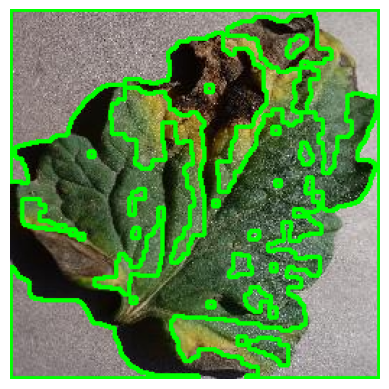

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image in grayscale mode
img = cv2.imread('nothealthy.JPG', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to remove noise
blur = cv2.GaussianBlur(img, (3, 3), 0)

# Apply Otsu's thresholding to get a binary mask
ret, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Perform morphological opening to remove small white noise regions
kernel = np.ones((5,5),np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

# Perform morphological closing to remove small black holes within white regions
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

# Find contours in the binary mask
contours, hierarchy = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on a copy of the original color image
img_color = cv2.imread('nothealthy.JPG')
cv2.drawContours(img_color, contours, -1, (0, 255, 0), 2)

# Display the result using matplotlib.pyplot
plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


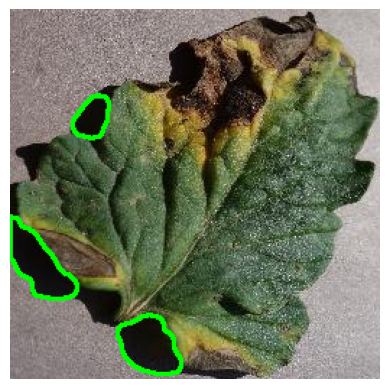

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image in color mode
img = cv2.imread('nothealthy.JPG')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to remove noise
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply adaptive thresholding to get a binary mask
thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 51, 2)

# Perform morphological opening to remove small white noise regions
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15,15))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

# Find contours in the binary mask
contours, hierarchy = cv2.findContours(opening, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Filter out small contours based on area
min_area = 500 # adjust this value as needed
contours_large = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]

# Draw the contours on a copy of the original color image
img_contours = img.copy()
cv2.drawContours(img_contours, contours_large, -1, (0, 255, 0), 2)

# Display the result using matplotlib.pyplot
plt.imshow(cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


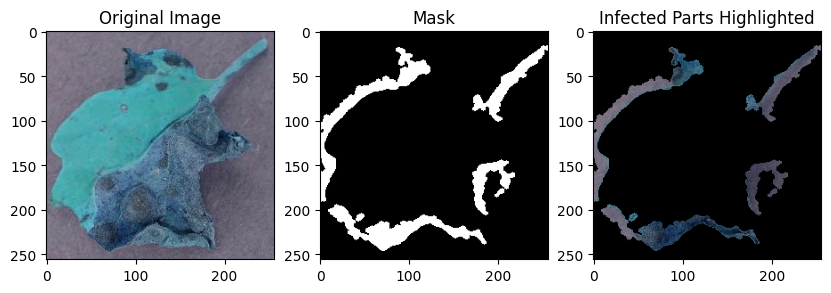

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# read the image
img = cv2.imread('unhealthy.JPG')

# convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# apply Gaussian blur to remove noise
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# apply adaptive thresholding to obtain a binary image
thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 25, 2)

# perform morphological opening to remove small objects and smooth edges
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

# find contours in the image
contours, hierarchy = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# create a mask for the infected parts of the leaf
mask = np.zeros_like(opening)
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 1000:
        cv2.drawContours(mask, [cnt], 0, 255, -1)

# apply the mask to the original image
result = cv2.bitwise_and(img, img, mask=mask)

# display the results
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[1].imshow(mask, cmap='gray')
ax[1].set_title('Mask')
ax[2].imshow(result)
ax[2].set_title('Infected Parts Highlighted')
plt.show()
